In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [3]:
data = pd.read_csv('G:/Loan Prediction - k -means -capstone 5/train.csv')

In [4]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Here we consider only 2 features to make visualization quick n clear. Lets take ApplicantIncome and LoanAmount and try to find correlation

In [7]:
X = data[['ApplicantIncome','LoanAmount']]

In [8]:
#Visualize dat apoints

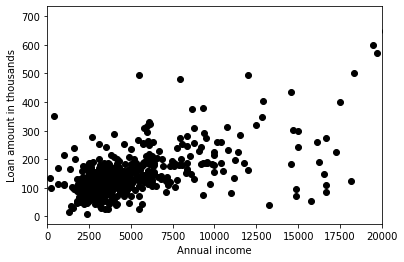

In [16]:
plt.scatter(X['ApplicantIncome'],X['LoanAmount'],c='black')
plt.xlabel('Annual income')
plt.ylabel('Loan amount in thousands')
plt.xlim(0,20000)
plt.show()

In [17]:
k=3

In [23]:
#select random observation as centroid
Centroid = (X.sample(n=k))

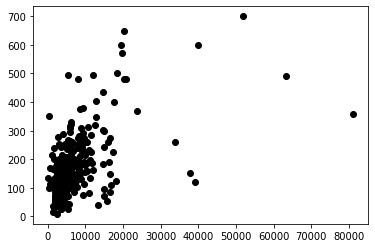

In [21]:
plt.scatter(X.ApplicantIncome,X.LoanAmount,c='black')

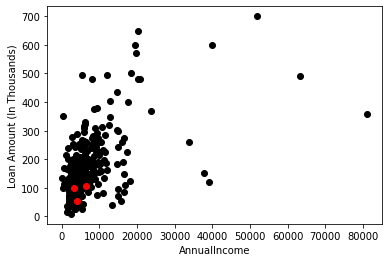

In [25]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [34]:
# Step 3 - Assign all the points to closest sluster centroid
# Step 4 - Recompute centroid of newly formed cluster
# Step 5 - Repeat 3 & 4
diff = 1
j = 0
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1 = (row_c.ApplicantIncome - row_d.ApplicantIncome)**2
            d2 = (row_c.LoanAmount - row_d.LoanAmount)**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i=i+1
            
    C=[]
    for index,row in X.iterrows():
        min_Dist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1]<min_Dist:
                min_Dist = row[i+1]
                pos = i+1
        C.append(pos)
    X['Cluster']=C
    Centroids_new = X.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']]
    if j==0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
    print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

    

C:\Users\Balamre\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Balamre\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AttributeError: 'int' object has no attribute 'sum'

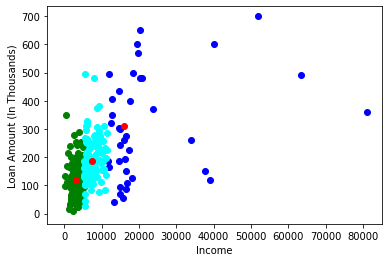

In [35]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()